# Machine Learning Linear Regression Model
***

### Importing Dependencies

In [3]:
# Importing dependencies:
import numpy as np
import pandas as pd

### Read the CSV and Perform Basic Data Cleaning

In [4]:
# Reading the csv file into a pandas DataFrame
mmr_without_race = pd.read_csv('../Resources/non_race_data.csv')
mmr_without_race

,year,state,id,state_code,latitude,longitude,deaths,births,maternal_mortality_ratio,population,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,2015,Alabama,US.AL,AL,32.318231,-86.902298,12.0,59657.0,20.11,2505795.0,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,2016,Alabama,US.AL,AL,32.318231,-86.902298,35.0,59151.0,59.17,2507714.0,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,2017,Alabama,US.AL,AL,32.318231,-86.902298,41.0,58941.0,69.56,2514911.0,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,2018,Alabama,US.AL,AL,32.318231,-86.902298,31.0,57761.0,53.67,2523756.0,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,2019,Alabama,US.AL,AL,32.318231,-86.902298,35.0,58615.0,59.71,2533668.0,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2014,Wisconsin,US.WI,WI,43.784440,-88.787868,16.0,67161.0,23.82,2898057.0,...,6207.0,18.7,9.0,0.165,0.067,415.4,2.0,21.9,125.0,7.1
304,2015,Wisconsin,US.WI,WI,43.784440,-88.787868,11.0,67041.0,16.41,2903737.0,...,6365.0,17.4,8.2,0.146,0.046,411.6,1.9,19.6,125.3,7.0
305,2016,Wisconsin,US.WI,WI,43.784440,-88.787868,15.0,66615.0,22.52,2905282.0,...,6324.0,17.3,6.5,0.114,0.106,403.2,1.9,18.0,140.3,7.3
306,2017,Wisconsin,US.WI,WI,43.784440,-88.787868,12.0,64975.0,18.47,2912745.0,...,6437.0,17.1,5.5,0.201,0.072,423.5,1.9,16.2,145.2,7.3


In [5]:
# Checking dataframe rows
mmr_without_race.count()

year                        308
state                       308
id                          308
state_code                  308
latitude                    308
longitude                   308
deaths                      308
births                      308
maternal_mortality_ratio    308
population                  308
employer                    308
non_group                   308
medicaid                    308
medicare                    308
military                    308
uninsured                   308
air_pollution_val           308
cancer_death_val            308
cardio_death_val            308
child_pov_val               308
choles_check_val            308
dent_vis_val                308
dentists_val                308
diabetes_val                308
drug_deaths_val             308
health_stat_fem_val         308
immun_child_val             308
income_ineq_val             308
infant_mort_val             308
infect_dis_val              308
obesity_val                 308
phys_ina

In [6]:
# Checking data types and columns
mmr_without_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      308 non-null    int64  
 1   state                     308 non-null    object 
 2   id                        308 non-null    object 
 3   state_code                308 non-null    object 
 4   latitude                  308 non-null    float64
 5   longitude                 308 non-null    float64
 6   deaths                    308 non-null    float64
 7   births                    308 non-null    float64
 8   maternal_mortality_ratio  308 non-null    float64
 9   population                308 non-null    float64
 10  employer                  308 non-null    float64
 11  non_group                 308 non-null    float64
 12  medicaid                  308 non-null    float64
 13  medicare                  308 non-null    float64
 14  military  

In [8]:
mmr_without_race.columns

Index(['year', 'state', 'id', 'state_code', 'latitude', 'longitude', 'deaths',
       'births', 'maternal_mortality_ratio', 'population', 'employer',
       'non_group', 'medicaid', 'medicare', 'military', 'uninsured',
       'air_pollution_val', 'cancer_death_val', 'cardio_death_val',
       'child_pov_val', 'choles_check_val', 'dent_vis_val', 'dentists_val',
       'diabetes_val', 'drug_deaths_val', 'health_stat_fem_val',
       'immun_child_val', 'income_ineq_val', 'infant_mort_val',
       'infect_dis_val', 'obesity_val', 'phys_inac_val', 'prem_death_val',
       'smoking_val', 'uninsured_val', 'all_determs_val', 'all_outcomes_val',
       'chlamydia_val', 'prem_death_ri_val', 'teen_birth_val',
       'primary_care_val', 'low_birthweight_val'],
      dtype='object')

### Selected Features for the model

In [9]:
# Selecting the features from the dataframe that will be the X values
selected_features = mmr_without_race[['deaths',
       'births', 'maternal_mortality_ratio', 'population', 'employer',
       'non_group', 'medicaid', 'medicare', 'military', 'uninsured',
       'air_pollution_val', 'cancer_death_val', 'cardio_death_val',
       'child_pov_val', 'choles_check_val', 'dent_vis_val', 'dentists_val',
       'diabetes_val', 'drug_deaths_val', 'health_stat_fem_val',
       'immun_child_val', 'income_ineq_val', 'infant_mort_val',
       'infect_dis_val', 'obesity_val', 'phys_inac_val', 'prem_death_val',
       'smoking_val', 'uninsured_val', 'all_determs_val', 'all_outcomes_val',
       'chlamydia_val', 'prem_death_ri_val', 'teen_birth_val',
       'primary_care_val', 'low_birthweight_val']]
selected_features.head()

,deaths,births,maternal_mortality_ratio,population,employer,non_group,medicaid,medicare,military,uninsured,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,12.0,59657.0,20.11,2505795.0,57.4,8.9,13.6,4.0,2.2,13.9,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,35.0,59151.0,59.17,2507714.0,58.7,9.1,13.8,3.8,1.9,12.7,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,41.0,58941.0,69.56,2514911.0,58.0,8.6,13.6,4.2,2.3,13.3,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,31.0,57761.0,53.67,2523756.0,58.8,7.5,13.7,3.6,2.5,13.9,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,35.0,58615.0,59.71,2533668.0,58.8,7.8,13.9,3.8,2.4,13.3,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3


### Ploting Data for Visualization

<AxesSubplot:>

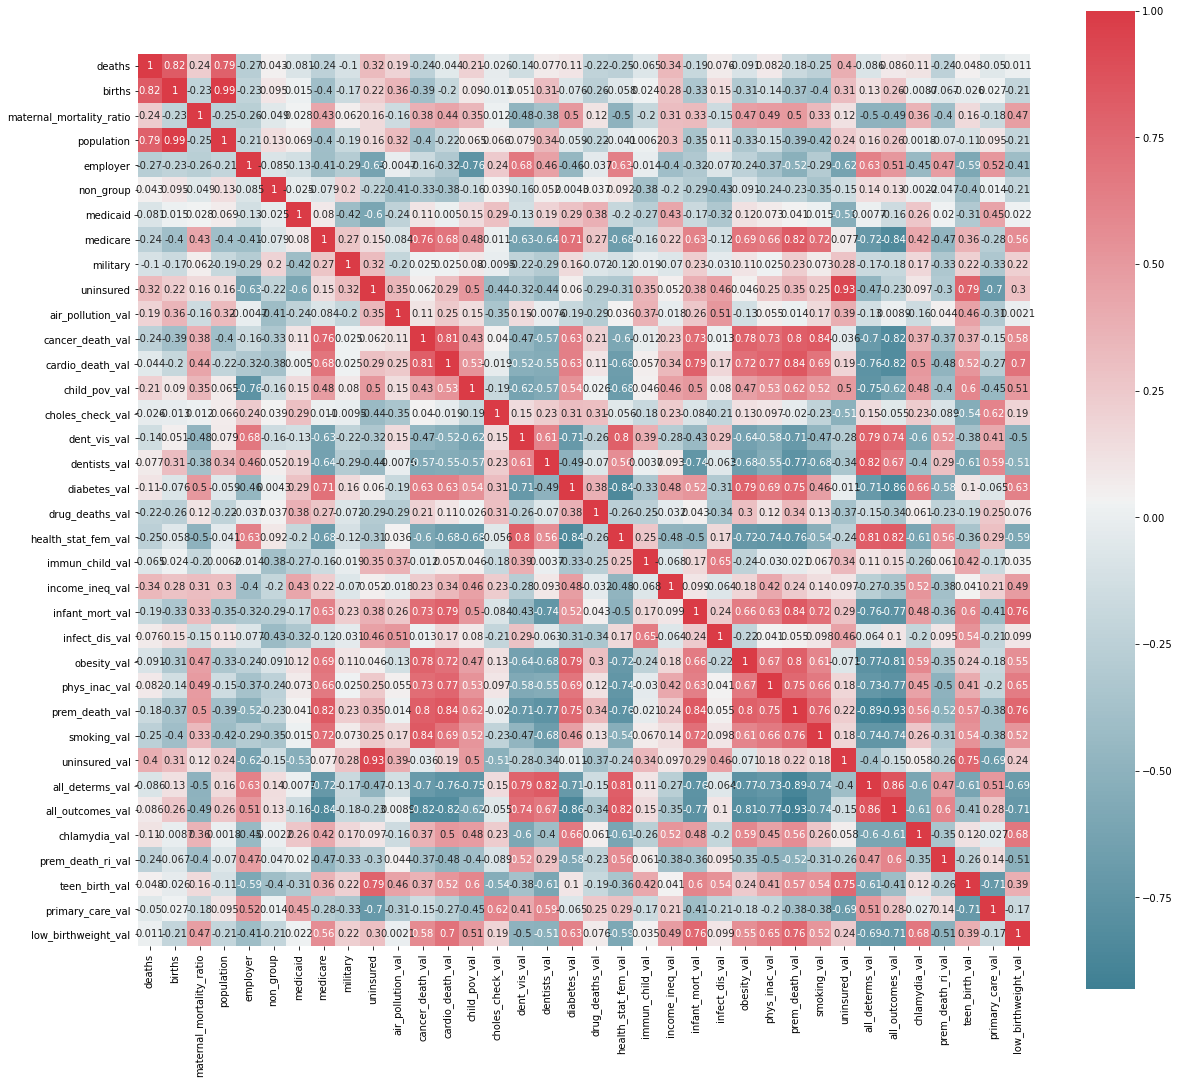

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Using the figure, axes together using `plt.subplots()` function:
fig, ax = plt.subplots(figsize=(20, 18))



# Calculating the correlation matrix for each features in dataset 
corr = selected_features.dropna().corr()

# Plotting the heatmap
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, ax=ax)

### Creating a Train Test Split
***
We are using `maternal_mortality_ratio` for the y values

In [ ]:
# Select